In [1]:
import numpy as np 
import pandas as pd 

real_data = pd.read_csv('kaggle/input/fake-and-real-news-dataset/True.csv')
fake_data = pd.read_csv('kaggle/input/fake-and-real-news-dataset/Fake.csv') 

real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [2]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
print(len(real_data))
print(len(fake_data))

nb_articles = min(len(real_data), len(fake_data))
real_data = real_data[:nb_articles]
fake_data = fake_data[:nb_articles]

print(len(real_data))
print(len(fake_data))

21417
23481
21417
21417


In [4]:
real_data['is_fake'] = False
fake_data['is_fake'] = True

In [5]:
real_data.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",False


In [6]:
fake_data.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",True
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",True
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",True
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",True
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",True


In [7]:
from sklearn.utils import shuffle

data = pd.concat([real_data, fake_data])

# Shuffle the data
data = shuffle(data).reset_index(drop=True)
data.head()

,title,text,subject,date,is_fake
0,Fox’s Uncle Tom Sheriff: Hillary’s Hot Sauce ...,Fox News loves Wisconsin s Sheriff David Clark...,News,"April 20, 2016",True
1,Spain's Socialist leader says would back gover...,MADRID (Reuters) - The leader of Spain s Socia...,worldnews,"October 9, 2017",False
2,'Death to blasphemers' increasing as political...,"SWABI, Pakistan (Reuters) - Three police offic...",worldnews,"October 27, 2017",False
3,What? First Graders Asked Not to Use the Words...,What the heck happened to our freedom of speec...,left-news,"Aug 31, 2017",True
4,"Senate confirms two FERC commissioners, restor...",WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"August 4, 2017",False


In [8]:
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

del real_data
del fake_data

print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 25700
Size of validation set: 8567
Size of testing set: 8567


In [10]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
model.config.num_labels = 1

/home/asus/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from

In [11]:
# Freeze the pre trained parameters
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)

In [12]:
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)

In [13]:
def preprocess_text(text):
    parts = []

    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len / delta)
    nb_cuts = min(nb_cuts, max_parts)
    
    
    for i in range(nb_cuts + 1):
        text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
        parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

    return parts

In [14]:
print_every = 300

total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=1

model.train()

for idx, row in train_data.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['is_fake']]).long().to(device)

    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_data), average_loss))
        all_losses.append(average_loss)
        total_loss = 0

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/25700. Average loss: 0.2430707951200505
600/25700. Average loss: 0.22141117994983991
900/25700. Average loss: 0.20012533182743936
1200/25700. Average loss: 0.17766257461470863
1500/25700. Average loss: 0.15881202387468268
1800/25700. Average loss: 0.12067974441733288
2100/25700. Average loss: 0.11317372348198357
2400/25700. Average loss: 0.11596475827900576
2700/25700. Average loss: 0.09764335559964821
3000/25700. Average loss: 0.09734714188297706
3300/25700. Average loss: 0.10713905717161348
3600/25700. Average loss: 0.09964627208323994
3900/25700. Average loss: 0.09444828176950977
4200/25700. Average loss: 0.08677639921615385
4500/25700. Average loss: 0.09137093293344757
4800/25700. Average loss: 0.08272436030393389
5100/25700. Average loss: 0.09185978496854659
5400/25700. Average loss: 0.09285439701396778
5700/25700. Average loss: 0.0846868276619595
6000/25700. Average loss: 0.08299395855177256
6300/25700. Average loss: 0.0850372592631417
6600/25700. Average loss: 0.094030558030

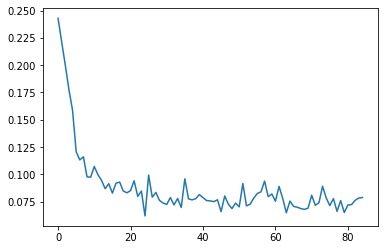

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.save(model.state_dict(), "model_after_train.pt")

plt.plot(all_losses)

In [16]:
total = len(test_data)
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test_data.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['is_fake']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
            
        result = overall_output.max(0)[1].float().item()
 
        if result == label.item():
            number_right += 1
            
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))

300/8567. Current accuracy: 0.9133333333333333
600/8567. Current accuracy: 0.9133333333333333
900/8567. Current accuracy: 0.9277777777777778
1200/8567. Current accuracy: 0.9233333333333333
1500/8567. Current accuracy: 0.9246666666666666
1800/8567. Current accuracy: 0.9216666666666666
2100/8567. Current accuracy: 0.9204761904761904
2400/8567. Current accuracy: 0.9208333333333333
2700/8567. Current accuracy: 0.9233333333333333
3000/8567. Current accuracy: 0.9253333333333333
3300/8567. Current accuracy: 0.9257575757575758
3600/8567. Current accuracy: 0.925
3900/8567. Current accuracy: 0.9248717948717948
4200/8567. Current accuracy: 0.9252380952380952
4500/8567. Current accuracy: 0.9253333333333333
4800/8567. Current accuracy: 0.9239583333333333
5100/8567. Current accuracy: 0.9243137254901961
5400/8567. Current accuracy: 0.9238888888888889
5700/8567. Current accuracy: 0.9243859649122808
6000/8567. Current accuracy: 0.9248333333333333
6300/8567. Current accuracy: 0.9242857142857143
6600/856

In [45]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "fake"
    if result.item() == 0:
        term = "real"

    print("{} at {}%".format(term, value.item() * 100))

In [46]:
true1 = """
Price spikes, however, would cause demand to wither and some expensive avocados might be leftover, and stores might try to ration avocados, he added.
"Exactly what the retail strategy would be in this case, I’m not sure. But we would have vastly fewer avocados," Sumner said.
Just how fast avocados would disappear, if at all, would depend on whether the Trump administration enacts a full or partial border closure. White House economic adviser Larry Kudlow told CNBC he’s looking for ways to keep some commerce flowing.
"We are looking at different options, particularly if you can keep those freight lanes, the truck lanes, open," he said this week.  
Ben Holtz owns Rocky H Ranch, a 70-acre family-run avocado farm in northern San Diego County. He agreed avocados would run out within weeks.
"Mexico is the big player today. California is not. You shut down the border and California can’t produce to meet the demand," Holtz said. "There will be people without their guacamole."
While Mexico’s avocado harvest is year-round, California’s is limited to April through July. Growers in the state have picked only about 3 percent of what’s expected to be a much smaller crop of about 175 million pounds this year, Holtz said. A heat wave last summer reduced the crop size.
California’s avocado harvest has averaged approximately 300 million pounds in recent years, according to data from the California Avocado Commission. By contrast, the U.S. has imported more than 1.5 billion pounds of avocados from Mexico annually. Representatives from the commission did not respond to requests for this article.
Altogether, the U.S. received 43 percent of its fruit and vegetable imports from Mexico in 2016, according to the U.S. Department of Agriculture.
Also affecting this year’s avocado supply, a California avocado company in March recalled shipments to six states last month after fears the fruit might be contaminated with a bacterium that can cause health risks.
Until the early 2000s, California was the nation’s leading supplier of avocados, Holtz said. Mexico gradually overtook the state and now dominates sales in the U.S.
"It’s a very big possibility," Holtz said of avocado shortages. "Three weeks would dry up the Mexican inventory. California alone consumes more avocados than are grown in our state. Cold storage supply chain is basically three weeks or less of inventory. Most of the time it’s seven days."
A spokeswoman for the California Restaurant Association said "we haven’t heard concerns from restaurants, it doesn’t mean they aren’t worried." A national grocers association said it will "continue to closely monitor any developments" at the border, but did not have information about the potential impact on avocados.
"""

test(true1)

real at 88.06819915771484%


In [47]:
fake1="""As Michigan continued to count ballots in the presidential race, social media posts claimed that ballots were cast in the names of dead people.

"118-year-old William Bradley voted via an absentee ballot in Wayne County, Michigan this year. William died in 1984. They’re trying to steal this election," stated a Facebook post by Ryan Fournier, founder of Students for Trump.  

The post was flagged as part of Facebook’s efforts to combat false news and misinformation on its News Feed. (Read more about our partnership with Facebook.)

Screengrabs on social media showed a Detroit registered voter, William Bradley, with a date of birth in March 1902 and a date of death in June 1984. We entered his name in the state’s voter information website and found that he was listed as a registered voter. The state website showed that a ballot was sent to Bradley in September and received back Oct. 2.

A city official said that no ballot was cast on behalf of the dead voter.

William Bradley is a potentially common name. We found another William Bradley in the same zip code and spoke to him on the telephone Nov. 5.

Bradley told us that he shares the same name as his father who died in 1984, except he has the middle name of Tarnell. He told us that he lives in the same home where his father used to live. 

Bradley told us that he voted by mail due to the pandemic. He said that a ballot arrived for his dead father, but he threw that out.

"I didn’t use it, because I didn’t want to get it confused with mine," he said.

Bradley said that someone on Nov. 5 called him and told him there was a report all over the internet about this situation, so he called the city about it. A city official told him not to worry, because officials check for a matching signature and date of birth, he told us.

FEATURED FACT-CHECK

Viral image
stated on November 3, 2020 in a Facebook post
Says Michigan Gov. Gretchen Whitmer said, “I will not certify the vote in my state for Donald Trump, no matter the outcome.”
truefalse
By Ciara O'Rourke • November 4, 2020
We put Bradley’s name with his date of birth through the same state website. It showed that he is a registered voter and it showed his application for an absentee ballot was received in July, but it showed no ballot sent or received. 

Daniel Baxter, a consultant for the Detroit Department of Elections, sent us a statement that explained what happened:

"No ballot for the 118-year-old Mr. Bradley was ever requested, received or counted. A man with a nearly identical name requested a ballot and voted properly in both the primary and general elections.  When his ballot was initially logged, however, it was incorrectly attributed to the William Bradley born 118 years ago through a clerical error." 

Tracy Wimmer, spokesperson for Secretary of State Jocelyn Benson, told us that on rare occasions a ballot can be recorded inaccurately if names are identical, creating the impression that a ballot was cast in a dead voter’s name.

"This can be because of voters with similar names, where the ballot is accidentally recorded as voted by John Smith Sr when it was actually voted by John Smith Jr; or because of inaccurately recorded birth dates in the qualified voter file; for example, someone born in 1990 accidentally recorded as born in 1890," Wimmer said. "In such scenarios, no one ineligible has actually voted, and there is no impact on the outcome of the election. Local clerks can correct the issue when it is brought to their attention."

We have fact-checked many misleading claims about dead people on the voter rolls this year including in Detroit, Michigan, Virginia, Nevada and Wisconsin.

Our ruling
A Facebook post said "118-year-old William Bradley voted via an absentee ballot in Wayne County, Michigan this year. William died in 1984. They’re trying to steal this election."

A city elections official said that no ballot was cast for the now deceased Bradley. The official said that a man with a nearly identical name (Bradley’s son) voted in the election; however, when his ballot was initially logged it was incorrectly attributed to the William Bradley born 118 years ago. This was a clerical error, not voter fraud.

"""
test(fake1)

fake at 65.65760970115662%
